Nathan Jones, On my honor, as a student, I have neither given nor received unauthorized aid on this academic work

## Business and data understanding

the problem is trying to predict who will renew their season tickets, and who will not. This is relevent because it is useful for any organiztion to know who they should target their attempts to convince people to renew their tickets. It is more beneficial to target people that were not already going to renew their tickets. The potetial value of knowing who is likely to renew their tickets and who is not is very valuable because it would allow them to target their attempts to get people to renew their tickets much more accuratly.

## Data processing

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import the neccessary packages

In [33]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


import the dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


look at the data to find problems with it that need to be corrected for

In [35]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

find null values that need fixed

In [36]:
df = df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


change the blank spots to null values

In [37]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

count the null values

In [38]:
df = df.drop('CHILD', axis=1)

drop the child column because it has too many null values

In [39]:
df = df.drop('COMP', axis=1)

drop the comp column because it has too many null values

In [40]:
df = df.drop('SPORT', axis=1)

drop the sports column because it has too many null values

In [41]:
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


look at the data

In [42]:
df['games'] = df['Y1G1']+ df['Y1G2'] + df['Y1G3'] + df['Y1G4'] + df['Y1G5']
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,games
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68,2
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38,2
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194,1


combine the data from who went to the games  into one column

In [43]:
df = df.drop('Y1G1', axis=1)
df = df.drop('Y1G2', axis=1)
df = df.drop('Y1G3', axis=1)
df = df.drop('Y1G4', axis=1)
df = df.drop('Y1G5', axis=1)

drop the individual game data because we already have it all represented in the games column

In [44]:
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,games
0,580V74KT,0,15,8,1,94.0,4.0,0.0,1.0,77,203,3
1,298S54OK,1,15,3,1,NaN,NaN,0.0,0.0,53,68,2
2,268D25AO,1,15,11,1,67.0,2.0,0.0,1.0,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,1.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,1.0,1.0,65,194,1


look at the data

In [45]:
df['AGE'] = pd.to_numeric(df['AGE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
games       9216 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 864.1+ KB


age was an object so i converted it to a float

In [46]:
df = df.fillna({'AGE' : 0})
df = df.fillna({'INCOME' : 0})

replace the null values with zeros to get rid of null values

In [47]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
games          0
dtype: int64

check what null values are left

## Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AB4DB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001BC03198>]], dtype=object)

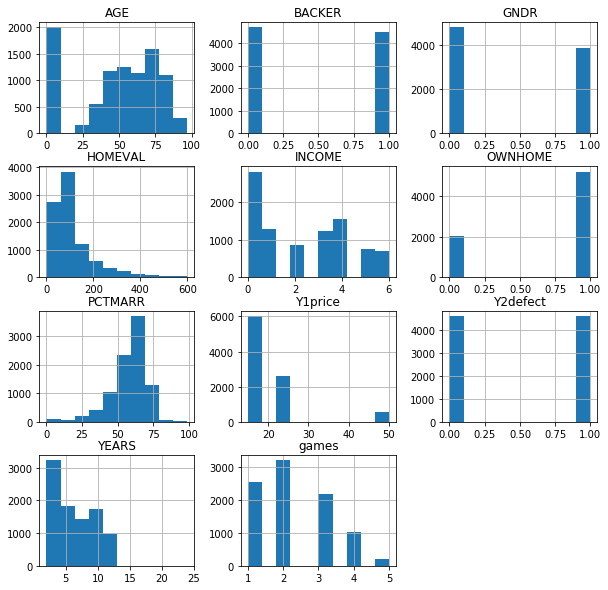

In [48]:
df.hist(figsize=(10,10))

look at a histogram of each of the data columns to see the distribution of each 

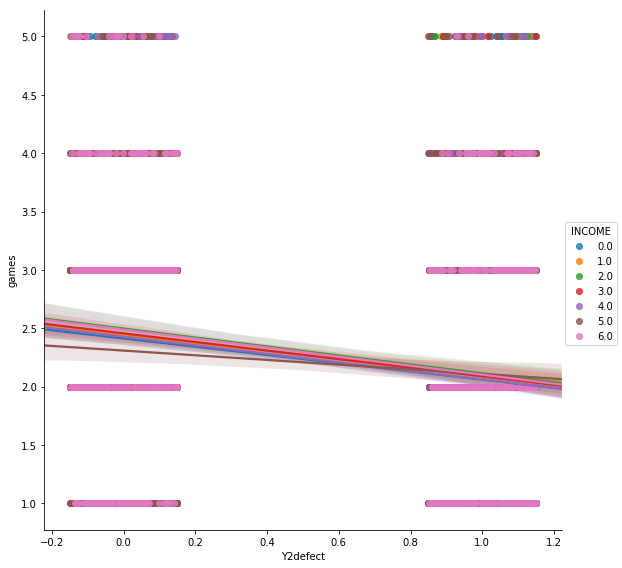

In [49]:
sns.lmplot("Y2defect", "games", df, hue="INCOME", x_jitter=.15, size=8)

get more information about the games and income columns

## Exploratory data analysis

In [50]:
df.corr()

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,games
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.030358,-0.001776,0.008438,-0.022388,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.001685,0.049080,0.045249,-0.018029,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.205889,-0.073361,-0.013408,-0.011307,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.107669,-0.073414,-0.024022,-0.018135,0.032558,-0.064727,0.220321
AGE,-0.030358,0.001685,0.205889,0.107669,1.000000,0.151618,0.035926,0.392056,0.020758,-0.000994,0.057729
INCOME,-0.001776,0.049080,-0.073361,-0.073414,0.151618,1.000000,0.088619,0.678481,0.152041,0.186814,0.004136
GNDR,0.008438,0.045249,-0.013408,-0.024022,0.035926,0.088619,1.000000,0.075907,0.053926,0.022454,-0.020839
OWNHOME,-0.022388,-0.018029,-0.011307,-0.018135,0.392056,0.678481,0.075907,1.000000,0.100576,-0.029668,0.013050
PCTMARR,-0.023869,0.008032,0.023691,0.032558,0.020758,0.152041,0.053926,0.100576,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,-0.000994,0.186814,0.022454,-0.029668,0.046570,1.000000,-0.011751


basic correlation analysis

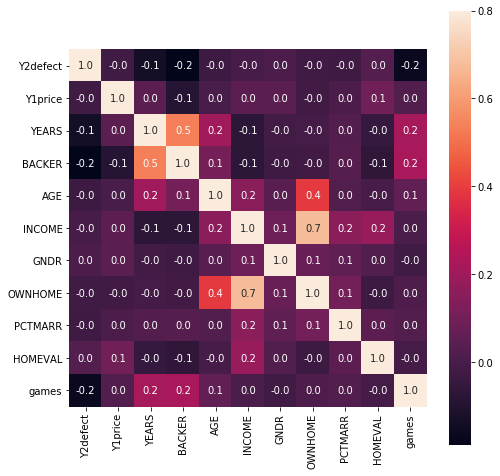

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

sns correlation plot

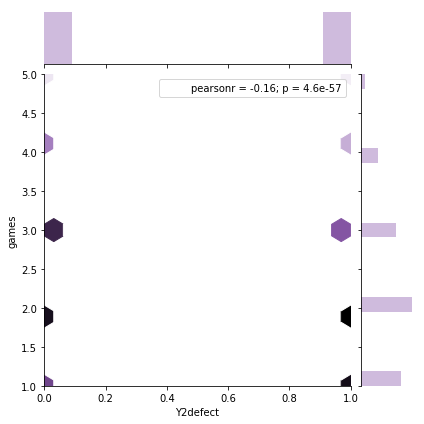

In [52]:
sns.jointplot("Y2defect", "games", df, kind="hex", color="#8855AA")

jointplot showing relaton between defect and games

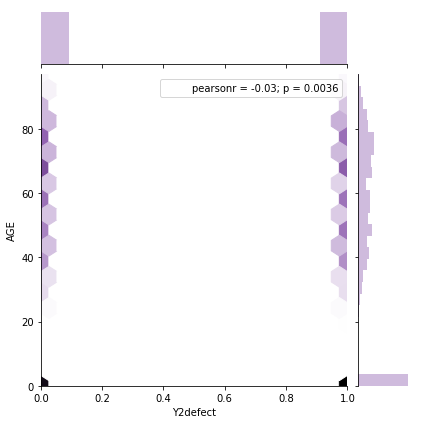

In [53]:
sns.jointplot("Y2defect", "AGE", df, kind="hex", color="#8855AA")

jointplot showing relation between defect and age

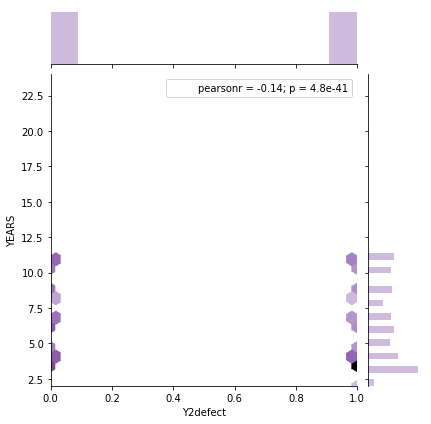

In [54]:
sns.jointplot("Y2defect", "YEARS", df, kind="hex", color="#8855AA")

jointplot showing relation between defect and years

## Model building

In [55]:
y = df['Y2defect']
X = df[['YEARS', 'BACKER', 'AGE', 'HOMEVAL', 'PCTMARR', 'games']]

set variables

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

run the decison tree

In [57]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.550090415913
--------------------------------------------------------
[[766 597]
 [647 755]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.56      0.55      1363
          1       0.56      0.54      0.55      1402

avg / total       0.55      0.55      0.55      2765

--------------------------------------------------------
0.550256001541


get the output

In [58]:
y = df['Y2defect']
X = df[['YEARS', 'BACKER', 'AGE', 'INCOME', 'HOMEVAL', 'PCTMARR', 'games']]

set the variables

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.99555121527777779

run randomforest

In [60]:
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.995551215278
[[4592   16]
 [  25 4583]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4608
          1       1.00      0.99      1.00      4608

avg / total       1.00      1.00      1.00      9216



gett the output, this time much better 

## Model Deployment & Prepare Entry Data

In [61]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


load the validation dataset

In [62]:
df2 = df2.replace(r'\s+', np.nan, regex=True)

In [63]:
df2 = df2.drop('CHILD', axis=1)

In [64]:
df2 = df2.drop('COMP', axis=1)

In [65]:
df2 = df2.drop('SPORT', axis=1)

In [66]:
df2['games'] = df2['Y2G1']+ df2['Y2G2'] + df2['Y2G3'] + df2['Y2G4'] + df2['Y2G5']

In [67]:
df2 = df2.drop('Y2G1', axis=1)
df2 = df2.drop('Y2G2', axis=1)
df2 = df2.drop('Y2G3', axis=1)
df2 = df2.drop('Y2G4', axis=1)
df2 = df2.drop('Y2G5', axis=1)

In [68]:
df2['AGE'] = pd.to_numeric(df['AGE'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 12 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         9216 non-null float64
INCOME      7127 non-null float64
GNDR        8977 non-null float64
OWNHOME     7590 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
games       9542 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 894.6+ KB


In [69]:
df2 = df2.fillna({'AGE' : 0})
df2 = df2.fillna({'INCOME' : 0})

In [70]:
validation = df2[['YEARS', 'BACKER', 'AGE', 'INCOME', 'HOMEVAL', 'PCTMARR', 'games']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 7 columns):
YEARS      9542 non-null int64
BACKER     9542 non-null int64
AGE        9542 non-null float64
INCOME     9542 non-null float64
HOMEVAL    9542 non-null int64
PCTMARR    9542 non-null int64
games      9542 non-null int64
dtypes: float64(2), int64(5)
memory usage: 521.9 KB


do all the same data processing to this set I did to the last set

In [71]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


set fakeid as the dataframe

In [72]:
# applying the decision tree model to validation dataset
output_scoring = clf.predict(validation)

# generating probability for defect for each fan
probs = clf.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

generate andd save the submission based on the new dataset and my model

## Final analysis & storytelling

There are many variables that are important, but in my model I used YEARS, BACKER, AGE, INCOME, HOMEVAL, PCTMARR, and games because I found these to be the most important. My model was over 99% accurate on the test model and I expect it to be equally as accurate on the next years data. The three most important variables for predicting if someone would renew their tickets were the amount of games they went to the previous year, how many years they have had season tickets, and weather or not they were in the teams backer club